In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mysarahmadbhat/quora-duplicate-qns

quora-duplicate-qns.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip /content/quora-duplicate-qns.zip

Archive:  /content/quora-duplicate-qns.zip
replace quora.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('quora.csv')
df.head(),df.shape

(   Unnamed: 0   index      id    qid1    qid2  \
 0           0    8067    8067   15738   15739   
 1           1  368101  368101   12736  104117   
 2           2   70497   70497  121486  121487   
 3           3  226567  226567  254474  258192   
 4           4   73186   73186   48103    3062   
 
                                            question1  \
 0                 How do I play Pokémon GO in Korea?   
 1  What are some of the best side dishes for crab...   
 2  Which is more advisable and better material fo...   
 3       How do I improve logical programming skills?   
 4             How close we are to see 3rd world war?   
 
                                            question2  is_duplicate  
 0                 How do I play Pokémon GO in China?             0  
 1  What are some good side dishes for buffalo chi...             0  
 2      What is the best server setup for buddypress?             0  
 3  How can I improve my logical skills for progra...             1  
 4  

In [9]:
df=df.iloc[:,3:]
df.head()

,qid1,qid2,question1,question2,is_duplicate
0,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          100000 non-null  int64 
 1   qid2          100000 non-null  int64 
 2   question1     100000 non-null  object
 3   question2     100000 non-null  object
 4   is_duplicate  100000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/((df['is_duplicate'].count()))*100)

0    62879
1    37121
Name: is_duplicate, dtype: int64
0    62.879
1    37.121
Name: is_duplicate, dtype: float64


In [13]:
# df=df.sample(30000,random_state=2)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

question=list(df['question1']+df['question2'])
cv=CountVectorizer(max_features=3000)
q1,q2=np.vsplit(cv.fit_transform(question).toarray(),2)

In [15]:
df1=pd.DataFrame(q1)
df2=pd.DataFrame(q2)
new_df=pd.concat([df1,df2],axis=1)
# new_df=new_df[:3000]

In [16]:
new_df=new_df[:30000]
new_df['is_duplicate']=df['is_duplicate']

In [17]:
new_df['q1_len']=df['question1'].str.len()
new_df['q2_len']=df['question2'].str.len()

In [18]:
new_df['q1_num_words']=df['question1'].apply(lambda x:len(x.split()))
new_df['q2_num_words']=df['question2'].apply(lambda x:len(x.split()))

In [19]:
def common_words(row):
  w1=set(map(lambda x:x.lower().strip(),row['question1'].split()))
  w2=set(map(lambda x:x.lower().strip(),row['question2'].split()))
  return len(w1&w2)

In [20]:
new_df['common_words']=df.apply(common_words,axis=1)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,34,34,8,8,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53,51,11,9,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,96,45,16,8,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,44,52,7,9,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,38,29,9,7,3


In [21]:
def total_words(row):
  w1=set(map(lambda x:x.lower().strip(),row['question1'].split()))
  w2=set(map(lambda x:x.lower().strip(),row['question2'].split()))
  return (len(w1)+len(w2))
  

In [22]:
new_df['total_words']=df.apply(total_words,axis=1)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2997,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,34,8,8,7,16
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53,51,11,9,6,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,96,45,16,8,2,24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,44,52,7,9,4,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,38,29,9,7,3,16


In [23]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,34,8,8,7,16,0.44
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,53,51,11,9,6,20,0.30
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,96,45,16,8,2,24,0.08
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,44,52,7,9,4,16,0.25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,38,29,9,7,3,16,0.19


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-25-1a02955e1311>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
<ipython-input-25-1a02955e1311>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicat

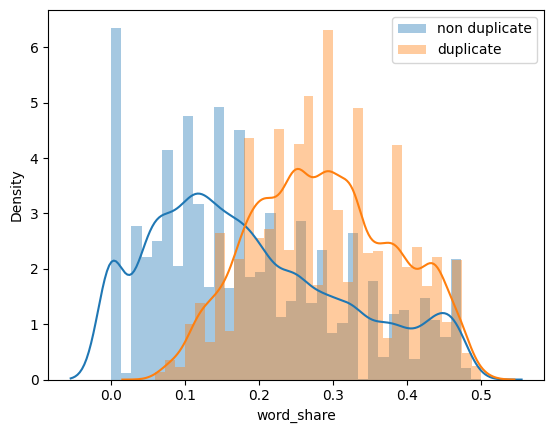

In [25]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [26]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#fuzzy features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
  q1=row['question1']
  q2=row['question2']

  fuzzy_features=[0.0]*4
  fuzzy_features[0]=fuzz.QRatio(q1,q2)
  fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
  fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
  fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)
  return fuzzy_features

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [30]:
fuzzy_features=df.apply(fetch_fuzzy_features,axis=1)[:30000]
new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[1],fuzzy_features))
new_df['fuzz_sort_ratio']=list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[3],fuzzy_features))

In [31]:
new_df.shape

(30000, 6012)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df.drop(columns=['is_duplicate']).values,new_df.loc[:,['is_duplicate']].values,test_size=0.2,random_state=1)

In [89]:
x_train.shape

(24000, 6011)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(x_train,y_train)


<ipython-input-33-21c34824faf3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [37]:
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7691666666666667

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3177,  596],
       [ 789, 1438]])

In [44]:
def common_words(q1,q2):
  w1=set(map(lambda x:x.lower().strip(),q1.split()))
  w2=set(map(lambda x:x.lower().strip(),q2.split()))
  return len(w1&w2)

In [45]:
def total_words(q1,q2):
  w1=set(map(lambda x:x.lower().strip(),q1.split()))
  w2=set(map(lambda x:x.lower().strip(),q2.split()))
  return (len(w1)+len(w2))

In [46]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(q1,q2):

  fuzzy_features=[0.0]*4
  fuzzy_features[0]=fuzz.QRatio(q1,q2)
  fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
  fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
  fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)
  return fuzzy_features

In [78]:
def query_point_creator(q1,q2):
  input_query=[]
  #preprocess
  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split()))
  input_query.append(len(q2.split()))

  input_query.append(common_words(q1,q2))
  input_query.append(total_words(q1,q2))
  input_query.append(round(common_words(q1,q2)/(total_words(q1,q2)),2))

  fuzzy_features=fetch_fuzzy_features(q1,q2)
  input_query.extend(fuzzy_features)

  q1_bow=cv.transform([q1]).toarray()
  q2_bow=cv.transform([q2]).toarray()

  return np.hstack((q1_bow,q2_bow,np.array(input_query).reshape(1,11)))

In [105]:
q1='where is the capital of india'
q2='what is the current capital of india'

In [96]:
x_train[2].reshape(1,6011)

array([[ 0.,  0.,  0., ..., 76., 80., 88.]])

In [103]:
query_point_creator(q1,q2).shape

(1, 6011)

In [106]:
rf.predict(query_point_creator(q1,q2))

array([1])

In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))